In [1]:
import google.generativeai as genai
import os
from dotenv import load_dotenv
import ast
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

#Funtions file with unique functions
import functions

C:\Users\CrazyFlie\anaconda3\envs\CrazyFlie\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the API key from environment variables
api_key = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=api_key)

In [3]:
requested_design = "Box"

In [4]:
current_coordinates = [[1,3]]

In [5]:
prompt = functions.create_prompt(current_coordinates=current_coordinates, requested_design=requested_design)
print(prompt)


A drone is being used to place building blocks on a grid.
Please read all of the following instructions first.

You will be asked to come up with the drop-off locations for the drone that create a specified design.
The origin of the grid is [0,0] in the bottom left corner and the last point is [4,4] in the top right.
The X axis goes from [0,0] to [4,0]. The Y axis goes from [0,0] to [0,4]. 

You can think of the grid like the pixels of a tv screen, with your job being to decide which pixel to turn on.
The grid currently looks like this, where "o" is an empty spot (or off pixel) and "x" is a spot that already contains a block (or on pixel):

4 o o o o o
3 o x o o o
2 o o o o o
1 o o o o o
0 o o o o o
  0 1 2 3 4



Any space marked with "x" has already been chosen and must be incorporated in the design you will create.
If spaces are already marked with "x", consider how different orientations of your design can best utilize them. 
This might mean you need to rotate or shift your chosen

In [11]:
# Define the prompt
prompt = prompt

model = genai.GenerativeModel('gemini-1.5-pro')
response = model.generate_content(prompt)

In [12]:
# Extract the response text
response_text = response.text
print(response_text)

{
    "Design": [
        {
            "Title": "Box",
            "Coordinates": [
                [1,1],
                [2,1],
                [3,1],
                [3,2],
                [3,3],
                [2,3],
                [1,3],
                [1,2]
            ],
            "Reasoning": "This design creates a box shape utilizing the existing block at [1,2] as a corner. The box occupies a 3x3 space within the grid."
      }
    ]
}



[[1, 1], [2, 1], [3, 1], [3, 2], [3, 3], [2, 3], [1, 3], [1, 2]]


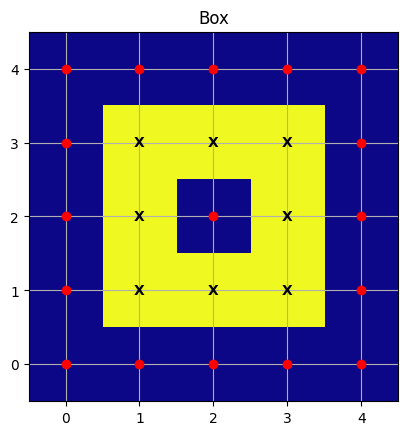

This design creates a box shape utilizing the existing block at [1,2] as a corner. The box occupies a 3x3 space within the grid.


In [13]:
# Load JSON data
data = json.loads(response_text)

# Loop through each design and plot
for design in data['Design']:
    title = design['Title']
    coordinates = design['Coordinates']
    print(coordinates)
    functions.plot_coordinates(title, coordinates)
    print(design['Reasoning'])

In [14]:
grid_representation = functions.create_grid_representation(coordinates=coordinates)
print(grid_representation)

4 o o o o o
3 o x x x o
2 o x o x o
1 o x x x o
0 o o o o o
  0 1 2 3 4



In [ ]:
Test_JSON_prompt = f"""
You were previously provided the following prompt: 
START PROMPT 
{original_prompt} 
END PROMPT

Your reponse to this prompt was the following JSON: 
START RESPONSE 
{JSON_Output} 
END RESPONSE

While executing the coordinates that were previoulsy provided, blocks were correctly placed at {correct_xy}.
However, an when trying to place a block at {desired_xy}, it was instead placed at {actual_xy}.

This means there are currently blocks at {correct_xy} and {actual_xy}.

You are now tasked with checking the design and recovering it if possible.

If the design is recoverable by continuing with the current plan in a different order, then
provide the coorindates where blocks still need to be placed in the JSON structure provided.

If the design is not recoverable with the current plan, then try to recover it with a new layout that incorparates the already placed blocks. 
A new layout might mean a different orientation of the design, such as turning the design or laterally shifting it, which is allowed if needed. 
Note that any block that has already been placed cannot be removed and therefore must be used in any new designs.
Make sure your design makes if you do a redisgn, then provide the coorindates where blocks still need to be placed at in the JSON structure provided.

Make sure to follow the instructions from the original prompt if needed.

If the design it not not recoverable at all, reply set the Title as "Design is not recoverable." and provide no Coordinates.
"""